![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png)  ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)
# Tasca M4T01

## **Anàlisi de xarxes socials mitjançant Spark i Python PySpark. Cas Twitter (X)**

### <font color="blue">Datos de Twitter recolectados durante las elecciones generales en España del 28 de abril de 2019</font>


En esta tarea vamos a introducir estructuras de datos complejas, donde los campos pueden a su vez tener campos anidados. En concreto utilizaremos datos de twitter capturados en el contexto de las elecciones generales en España del 28 de Abril de 2019. La práctica está estructurada de la siguiente manera:
- **Parte 0:** Configuración del entorno
- **Parte 1:** Introducción a data frames estructurados y cómo operar para extraer información *(3 puntos)*
    - **Parte 1.1:** Importar los datos *(1 puntos)*
    - **Parte 1.2:** *Queries* sobre data frames complejos *(2 puntos)*
        - **Parte 1.2.1:** Queries SQL *(1 puntos)*
        - **Parte 1.2.2:** Queries sobre el pipeline *(1 puntos)*
- **Parte 2:** Bases de datos HIVE y operaciones complejas *(3 puntos)*
    - **Parte 2.1:** Bases de datos Hive *(1 puntos)*
    - **Parte 2.2:** Más allá de las transformaciones SQL *(2 puntos)*
        - **Parte 2.2.1:** Tweets por población  *(1 puntos)*
        - **Parte 2.2.2:** Contar hashtags *(1 puntos)*
- **Parte 3:** Sampling *(2 Puntos)*
- **Parte 4**: Introducción a los datos relacionales *(2 puntos)*
     - **Parte 4.1**: Construcción de la edgelist *(1 puntos)*
     - **Parte 4.2**: Centralidad de grado *(1 puntos)*


## **Parte 0:** Configuración del entorno

<span style="color:navy"><strong>-> Per començar, resumim les etapes de descarrega i instal·lació del Spark per a que tot funcioni correctament</strong></span>

    * Verificar si es té Java 8 (1.8.231 en el meu cas) ; si no, escriure al Anaconda prompt o Notebook : 'conda install -c cyclus java-jdk'
    * Descarregar el fitxer per a Windows en 'https://www.apache.org/dyn/closer.lua/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz'
    * Posar el fitxer descarregat 'spark-3.5.1-bin-hadoop3.tgz' a la carpeta 'C:\spark' creada previament
    * Extreure amb 'right clic' o per consola bash
    * cmd : 'setx SPARK_HOME "C:\spark\spark-3.5.1-bin-hadoop3"'
    * cmd : 'setx PATH "%PATH%;%SPARK_HOME%\bin"'
    * Anaconda prompt o Notebook : 'pip install pyspark'
    * Anaconda prompt : 'pip install findspark'
    * Restart Notebook kernel and kepp on working...
    * cd C:\spark
    * spark-shell --version

In [2]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


<font color="blue">**Procesos de insatlación del entorno**</font>

-> Primero verificamos que Spark está instalado con **cmd** :***'pip install pyspark'*** y luego importamos las librerías necesarias

    ---> Requirement already satisfied: pyspark in c:\users\buba\anaconda3\lib\site-packages (3.5.1)
    ---> Requirement already satisfied: py4j==0.10.9.7 in c:\users\buba\anaconda3\lib\site-packages (from pyspark) (0.10.9.7)

* **import pyspark**: importación principal para utilizar las funcionalidades de PySpark

* **import findspark**: biblioteca para encontrar automáticamente la ruta de instalación de Spark en el sistema y configurar las variables de entorno necesarias para PySpark 

* **findspark.init()**: inicializa las variables de entorno necesarias para PySpark

* **import random**: se utiliza para generar números aleatorios en diversas aplicaciones de análisis de datos

* **import re**: proporciona operaciones de coincidencia de expresiones regulares útiles para el procesamiento de texto

* **import os**: módulo que proporciona funciones para interactuar con el sistema operativo, como acceder a variables de entorno o manipular rutas de archivo

* **import pandas as pd**: biblioteca para el análisis de datos tabulares ; se combina con PySpark para manipular datos en un formato más familiar antes de procesarlos con PySpark

* **from matplotlib import pyplot as plt**: biblioteca para crear gráficos y visualizaciones a partir de los datos procesados

* **from math import floor**: la función floor del módulo math se utiliza para redondear un número hacia abajo al entero más cercano en cálculos matemáticos simples o análisis de datos complejos y optimización de algoritmos ; 'ceil' sería la función que redondea hacia arriba al entero más cercano.

* **from pyspark import SparkConf, SparkContext, SQLContext, HiveContext**: 
     - SparkConf se utiliza para configurar la aplicación Spark
     - SparkContext es el punto de entrada principal para interactuar con Spark
     - SQLContext proporciona funcionalidades para trabajar con datos estructurados en Spark SQL
     - HiveContext se utiliza para interactuar con datos en un almacén de datos de Hive

* **from pyspark.sql import Row**: una clase en PySpark que se utiliza para representar una fila de datos en un DataFrame de Spark.


In [3]:
import pyspark
import findspark
findspark.init()
import random

In [4]:
pyspark


<module 'pyspark' from 'C:\\Users\\Buba\\anaconda3\\lib\\site-packages\\pyspark\\__init__.py'>

In [5]:
import re
import os
import pandas as pd
from matplotlib import pyplot as plt
from math import floor

from pyspark import SparkConf, SparkContext, SQLContext, HiveContext

from pyspark.sql import SparkSession
from pyspark.sql import Row

In [6]:
print('Hola')

Hola


In [7]:
from pyspark.sql import SparkSession

# Verificar si ya existe una SparkSession activa

if 'spark' in globals():
    spark.stop()
    print()
else : 
    print("No hay sesión en marcha")

No hay sesión en marcha


Para **Inicializar un contexto de Spark utilizando PySpark**: SparkContext es el punto de entrada principal para interactuar con Spark desde Python.

* **SparkContext** es la puerta de entrada para cualquier operación que quieras realizar utilizando Spark en tu programa Python. 
* **Iniciamos un contexto de Spark que se ejecutará localmente en el ordenador con un solo hilo (local[1])** con un nombre específico. 
* Una vez creado este contexto (**sc**), comenzar a utilizar Spark para realizar operaciones de procesamiento de datos distribuidos en Python. 
* Al crear un objeto SparkContext, configuramos el **entorno de ejecución de Spark** y establecemos la **conexión con el clúster de Spark** o con el **entorno local de máquina**.

In [8]:
import findspark
findspark.init("C:/spark/spark-3.5.1-bin-hadoop3")

import pyspark
from pyspark import SparkContext, SparkConf

In [9]:
# Introducir el nombre de la app M4T01_ seguido de vuestro nombre de usuario
# set Spark Context

sc = pyspark.SparkContext(master="local[1]", appName="M4T01_Cristina_Cosma2")
print("SparkContext created successfully")

SparkContext created successfully


* En el contexto de Spark, una **"aplicación"** se refiere al script, programa o proceso que utiliza Spark para procesar datos distribuidos. Es un término utilizado para describir el trabajo que se está realizando con Spark, ya sea un script de Python, un programa de Java, Scala u otro tipo de aplicación.

* La aplicación no se "guarda" en el sentido tradicional de una aplicación que se instala en un dispositivo o en un directorio específico del sistema sino que crea un objeto SparkContext con la aplicación llamada "M4T01_CristinaCosma" que será el punto de entrada para todas las operaciones que realizas con Spark en este programa Python. 

## **Parte 1: Introducción a data frames estructurados i operaciones sobre ellos.**

Como ya se ha mencionado, en esta práctica vamos ha utilizar **datos de Twitter que recolectamos durante las elecciones generales en España del 28 de abril de 2019**. 

Como veremos, los tweets tienen una estructura interna bastante compleja que hemos simplificado un poco en esta práctica.

### **Parte 1.1: Importar los datos**

**JSON (JavaScript Object Notation)**
-> Lo primero que vamos ha aprender es cómo **importar** este tipo de datos a nuestro entorno. Uno de los tipos de archivos más comunes para guardar este formato de información es [la estructura JSON](https://en.wikipedia.org/wiki/JSON). Esta estructura permite **guardar información en un texto plano de diferentes objetos** siguiendo una **estructura de diccionario** donde **cada campo tiene asignado una llave y un valor**. La estructura puede ser anidada, o sea que una llave puede tener como valor otra estructura tipo diccionario.

**Spark SQL** -> permite leer datos de muchos formatos diferentes. En esta ocasión, se os pide que leáis un fichero JSON . Este archivo contiene un pequeño *sample*, un **0.1% de la base de datos completa** (en un siguiente apartado veremos cómo realizar este ***sampleado***). En esta ocasión **no se os pide especificar la estructura del data frame** ya que la **función de lectura la inferirá automáticamente**.

* Con archivos **JSON en Spark SQL, no es necesario que el usuario proporcione manualmente la estructura del esquema de los datos** al leer el archivo JSON. 
* **Spark SQL puede hacerlo automáticamente mediante la inferencia de esquema**. 
* Por ejemplo, si el archivo JSON contiene objetos que tienen campos como "nombre", "edad" y "correo electrónico", Spark SQL detectará automáticamente estos campos y sus tipos de datos correspondientes (por ejemplo, cadena de caracteres para "nombre", entero para "edad" y cadena de caracteres para "correo electrónico") al leer el archivo.

In [28]:
# Nos aseguramos de que el archivo JSON está en la misma ruta que el Notebook .ipynb
# invocar el Spark Context creado antes para el Contexto SQL


In [10]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# Update the path to your JSON file
json_file_path = r'C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\IT-BigData\BigData_Sprint4_social-bigdata\BigData_Sprint4_Trabajo\tweets28a_sample.json'
tweets_sample = sqlContext.read.json(json_file_path)

print("Loaded dataset contains %d tweets" % tweets_sample.count())


C:\Users\Buba\anaconda3\lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Loaded dataset contains 401587 tweets


<font color="blue">**Resultado:**</font> 

-> Vemos con ambos códigos que el fichero JSON recoge un gran número de "TWEETS", en concreto **401 587**

* El siguiente paso es **mostrar la estructura del dataset que acabamos de cargar**. 
* Recordad que podéis obtener la información acerca de cómo está estructurado el **DataTable utilizando el método ```printSchema()```**.

In [11]:
# Utiliza el método printSchema() en el DataFrame tweets_sample
# tweets_sample.<FILL IN>

tweets_sample.printSchema()


root
 |-- _id: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: long (nullable = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- user_mentions: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- id: double (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- screen_name: string (nullable = true)
 |-- fa

Podéis observar que la **estructura del tweet contiene múltiples campos anidados**. Teneis que familiarizaros con esta estructura ya que será la que utilizaremos durante toda la práctica. Recordad también que no todos los tweets tienen todos los campos, como por ejemplo la ubicación (campo ```place```). Cuando esto pasa el campo pasa a ser ```NULL```. Podéis ver mas información sobre este tipo de datos en [este enlace](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

<font color="blue">**Comentario sobre el resultado**</font>

---> El esquema se presenta en formato de árbol, donde cada nivel del árbol representa una columna del DataFrame y la estructura de datos que contiene. Aquí, el término "root" indica el nivel superior del árbol, que representa el DataFrame en su totalidad. El resultado obtenido muestra el **esquema del DataFrame**, el cual proporciona información sobre la estructura de los datos y los tipos de datos de cada columna. 

---> También informa sobre la estructura interna de las columnas de tipo compuesto. Por ejemplo, se pueden ver campos anidados dentro de la columna coordinates, como coordinates y type, así como dentro de otras columnas como entities, place, quoted_status, retweeted_status y user. Estos campos anidados representan la estructura de datos dentro de las columnas compuestas y pueden contener una combinación de tipos de datos simples y compuestos.Aquí algunas observaciones:

* El DataFrame tiene varias estructuras anidadas, incluyendo structs y arrays, reflejando la naturaleza jerárquica de los datos.
* Cada columna se lista junto con su tipo de dato (por ejemplo, string, long, boolean) y si permite valores nulos (nullable = true/false).
* Por ejemplo, la columna _id es de tipo string y permite valores nulos.
* Algunas columnas contienen structs anidados, como coordinates, entities, place, quoted_status, retweeted_status, los cuales desglosan aún más los datos en subcampos.
* Hay arrays presentes en algunas columnas, como hashtags, user_mentions, coordinates, etc., indicando que estas columnas pueden contener múltiples valores.


### **Parte 1.2: *Queries* sobre data frames complejos**

Vamos a trabajar utilizando sentencias *SQL* y utilizar algunos conceptos bàsicos introduciendo algunos otros más avanzados y una nueva manera de trabajar sobre data tables.

#### **Parte 1.2.1:** Queries SQL

El primer paso consiste en **registrar la tabla en el contexto SQL** comprobando primero si existe y borrarla en el caso que sea así. 

En este apartado se os pide que registréis la tabla ```tweets_sample``` que acabamos de cargar en el contexto SQL bajo el mismo nombre ```tweets_sample```.

* Para registrar la tabla tweets_sample en el contexto SQL, primero verificar si la tabla ya existe y, si es así, borrarla. 
* Luego, registrar la tabla en el contexto SQL bajo el mismo nombre tweets_sample.

In [16]:
sqlContext.sql('DROP TABLE IF EXISTS tweets_sample')
sqlContext.registerDataFrameAsTable(tweets_sample, 'tweets_sample')


<font color="blue">**Resultado:**</font> 

-> Vemos que 'tweets_sample' SQL no existía y ha sido creada (sin necesidad de borrarse o pararse el contexto o la sesión).

Ahora se os pide que creeis una tabla ```users_agg``` con [la información agregada](https://www.w3schools.com/sql/sql_groupby.asp) de los usuarios que tengan definido su idioma (```user.lang```) como español (```es```). En concreto se os pide que la tabla contenga las siguientes columnas:
- **screen_name:** nombre del usuario
- **friends_count:** número máximo (ver nota) de personas a las que sigue
- **tweets:** número de tweets realizados
- **followers_count:** número máximo (ver nota) personas que siguen al usuario.

El orden en el cual se deben **mostrar los registros en orden descendente** acorde al número de tweets realizados.

***Nota:*** es importante que os fijéis que el **nombre de *friends* i *followers* puede diferir** a lo largo de la adquisición de datos. En este caso vamos ha utilizar la función de agregación ```MAX``` sobre cada uno de estos campos para **evitar segmentar el usuario en diversas instancias**.

In [17]:
# Crear la tabla users_agg con la información agregada de los usuarios que tengan definido su idioma como español

users_agg = sqlContext.sql("""
    SELECT user.screen_name AS screen_name,
           MAX(user.friends_count) AS friends_count,
           COUNT(*) AS tweets,
           MAX(user.followers_count) AS followers_count
    FROM tweets_sample
    WHERE user.lang = 'es'
    GROUP BY user.screen_name
    ORDER BY tweets DESC""")

# Mostrar los primeros 10 registros de la tabla agregada
users_agg.limit(10).show()


+---------------+-------------+------+---------------+
|    screen_name|friends_count|tweets|followers_count|
+---------------+-------------+------+---------------+
|       anaoromi|         6322|   223|           6869|
|    RosaMar6254|         6252|   141|           6292|
|MariaJo40891027|          880|   134|            849|
|    DuroBelinda|         5246|   129|           5791|
| locuspolitikus|        11263|   120|          10261|
|   rosavergar23|          974|   109|           1294|
|  Rafa_eltorete|          930|    98|           1084|
|    CurritoRojo|         4997|    96|           4235|
|   meme_montero|         1539|    94|           1558|
| Perona10690463|         1191|    94|           1585|
+---------------+-------------+------+---------------+



In [18]:
output = users_agg.first()
assert output.screen_name == 'anaoromi' and output.friends_count == 6322 and output.tweets == 223 and output.followers_count == 6869, "Incorrect output"

<font color="blue">**Resultado:**</font> 

-> Acabamos de hacer una consulta en un **contexto SQL** para crear una tabla llamada ***users_agg***, donde seleccionamos nombres de usuarios y otras variables mencionadas para descubrir cuáles son los usuarios que más tweets han escrito y nos quedamos con los 10 primeros.

-> La tabla aparece por orden de usuario primero, mediante la función "GROUP BY" 

-> La **persona que más tweets ha escrito** es ***anaoromi***, seguida de ***RosaMar6254*** y ***MariaJo40891027***

-> Vemos que ***anaoromi** tiene registrados a 6322 amigos y 6869 seguidores como máximo, y 223 tweets 

In [19]:
# Filter the DataFrame to get data for screen_name = 'anaoromi'
anaoromi_data = users_agg.filter(users_agg.screen_name == 'anaoromi')

# Show the data for 'anaoromi'
anaoromi_data.show()

+-----------+-------------+------+---------------+
|screen_name|friends_count|tweets|followers_count|
+-----------+-------------+------+---------------+
|   anaoromi|         6322|   223|           6869|
+-----------+-------------+------+---------------+



<font color="blue">**Resultado:**</font> 

* El resultado es el esperado cuando pedimos que acierte (mediante boolean) al preguntarle por la primera fila de valores
* El resultado es el esperado cuando filtramos los datos de 'anaoromi'
* Ahora vamos a ver la estructura de la tabla que acabamos de crear:

Imaginad ahora que queremos **combinar la información que acabamos de generar** con información acerca del **número de veces que un usuario ha sido retuiteado**. Para hacer este tipo de combinaciones necesitamos recurrir al **[```JOIN``` de tablas](https://www.w3schools.com/sql/sql_join.asp). Primero debemos registrar la tabla que acabamos de generar en el contexto SQL**. Recordad que primero debéis **comprobar si la tabla existe y en caso afirmativo eliminarla ('drop table if exists <tabla>')**. La tabla tenéis que registrarla bajo el nombre de ```user_agg```.

**Comprobamos la exstencia o la inexistencia de la tabla y la registramos en un contexto SQL.**
* Si la tabla existe, pedimos que sea borrada.
* Una vez borrada o inexistente, registramos una con la tabla que nos interesa.

In [20]:
# Hacemos el proceso que se hizo con tweets_sample

sqlContext.sql('DROP TABLE IF EXISTS user_agg')
sqlContext.registerDataFrameAsTable(users_agg, 'user_agg')

<font color="blue">**Resultado:**</font> 

-> Se acaba de registrar la tabla 'user_agg' según la de 'users_agg' que habíamos creado previamente.

Una vez registrada se pide que combinéis esta tabla y la tabla ```tweets_sample``` utilizando un ```INNER JOIN``` para obtener una nueva tabla con la siguiente información:
- ***screen_name:*** nombre de usuario
- ***friends_count:*** número máximo de personas a las que sigue
- ***followers_count:*** número máximo de personas que siguen al usuario.
- ***tweets:*** número de tweets realizados por el usuario.
- ***retweeted:*** número de retweets obtenidos por el usuario.
- ***ratio_tweet_retweeted:*** ratio de retweets por número de tweets publicados $\frac{retweets}{tweets}$

In [21]:
retweeted = sqlContext.sql("""
SELECT user_agg.screen_name 
AS screen_name, 
    user_agg.friends_count,
    user_agg.followers_count,
    user_agg.tweets,
    COUNT(*) As retweeted,
    COUNT(*) / user_agg.tweets AS ratio_tweet_retweeted
FROM user_agg

INNER JOIN tweets_sample 
ON user_agg.screen_name = tweets_sample.retweeted_status.user.screen_name
WHERE user_agg.tweets > 0

GROUP BY user_agg.screen_name, user_agg.friends_count, user_agg.followers_count, user_agg.tweets
ORDER BY ratio_tweet_retweeted DESC""")

retweeted.limit(10).show()

# Retweeted_status está dentro de la estructura de la tabla inicial JSON tweets_sample como: 
#      root:|-- retweeted_status: struct (nullable = true)

+---------------+-------------+---------------+------+---------+---------------------+
|    screen_name|friends_count|followers_count|tweets|retweeted|ratio_tweet_retweeted|
+---------------+-------------+---------------+------+---------+---------------------+
| AntonioMaestre|         1331|         262284|     1|     2009|               2009.0|
|Pablo_Iglesias_|         2831|        2289182|     2|     2013|               1006.5|
| RubenSanchezTW|          751|         158867|     1|      702|                702.0|
|sanchezcastejon|         6125|        1010813|     2|     1398|                699.0|
|  InesArrimadas|         1257|         489884|     1|      685|                685.0|
|    JonInarritu|         5113|          89789|     2|     1206|                603.0|
|jonathanmartinz|          706|          93938|     1|      576|                576.0|
| Irene_Montero_|         1868|         307213|     1|      569|                569.0|
|   GuajeSalvaje|         5942|          29

In [22]:
output = retweeted.first()
assert output.screen_name == 'AntonioMaestre' and output.friends_count == 1331 and output.tweets == 1 and output.followers_count == 262284 and output.ratio_tweet_retweeted == 2009.0 and output.retweeted == 2009, "Incorrect output"

<font color="blue">**Resultado:**</font> 

-> El usuario 'screen_name' que más se retweeteado, es AntonioMaestre, con un 'ratio_tweet_retweeted' de 2009 veces.

#### **Parte 1.2.2:** Queries a través de la API

Las tablas de Spark SQL ofrecen otro mecanismo para aplicar las transformaciones y obtener resultados similares a los que se obtendría aplicando una consulta SQL. Por ejemplo utilizando el siguiente pipeline obtendremos el texto de todos los tweets en español:

```
tweets_sample.where("lang == 'es'").select("text")

```

Que es equivalente a la siguiente sentencia SQL:

```
SELECT text
FROM tweets_sample
WHERE lang == 'es'
```

Podéis consultar el [API de spark SQL](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html) para encontrar más información sobre como utilitzar las diferentes transformaciones en tablas.

En este ejercicio se os pide que **repliquéis la query obtenida en el apartado anterior** empezando por generar la tabla ```users_agg```. Podéis utilizar las transformaciones ```where```, ```select``` (o ```selectExpr```), ```groupBy```, ```count```, ```agg``` y ```orderBy```

In [23]:
# elegimos las columnas que queremos encontrar en la nueva tabla

users = tweets_sample.where("user.lang == 'es'").select("user.screen_name", "user.friends_count", "user.followers_count")

users_agg = users.groupBy("screen_name")\
                .agg({"screen_name":"count", "followers_count":"max", "friends_count":"max"})\
                .withColumnRenamed("count(screen_name)", "tweets")\
                .orderBy("tweets", ascending=False)

users_agg.limit(10).show()

+---------------+------------------+------+--------------------+
|    screen_name|max(friends_count)|tweets|max(followers_count)|
+---------------+------------------+------+--------------------+
|       anaoromi|              6322|   223|                6869|
|    RosaMar6254|              6252|   141|                6292|
|MariaJo40891027|               880|   134|                 849|
|    DuroBelinda|              5246|   129|                5791|
| locuspolitikus|             11263|   120|               10261|
|   rosavergar23|               974|   109|                1294|
|  Rafa_eltorete|               930|    98|                1084|
|    CurritoRojo|              4997|    96|                4235|
|   meme_montero|              1539|    94|                1558|
| Perona10690463|              1191|    94|                1585|
+---------------+------------------+------+--------------------+



<font color="blue">**Comentario:**</font> 
* Vemos que obtenemos los mismos resultados en cuanto al contenido de los datos 
* Este fragmento de código primero filtra a los **usuarios que tuitean en español** y selecciona la información relevante de los usuarios. Luego, agrupa los datos por screen_name, realiza agregaciones para contar los tuits y encontrar el número máximo de seguidores y amigos
* Luego **renombra la columna de conteo a tweets**, y ordena los resultados por el número de tuits en orden descendente.

In [24]:
# Query to filter tweets in Spanish and select their text
spanish_tweets = tweets_sample.where("lang == 'es'").select("text")

In [25]:
print(spanish_tweets)

DataFrame[text: string]


Si os fijáis veréis que el nombre de las columnas no corresponde con el obtenido anteriormente, podéis cambiar el nombre de una columna determinada utilizando la transformación ```withColumnRenamed```. Cambiad el nombre de las columnas para que coincidan con el apartado anterior y guardadlas en una variable ```user_agg_new```.

In [26]:
# Renombrar las variables : se las variables se encuentran a la izquierda y sus nuevvos nombres, entre "" a su derecha

users_agg_new = users_agg.withColumnRenamed("max(friends_count)", "friends_count")\
                         .withColumnRenamed("max(followers_count)", "followers_count")\
                         .withColumnRenamed("count(screen_name)", "screen_name")

users_agg_new.limit(10).show()

+---------------+-------------+------+---------------+
|    screen_name|friends_count|tweets|followers_count|
+---------------+-------------+------+---------------+
|       anaoromi|         6322|   223|           6869|
|    RosaMar6254|         6252|   141|           6292|
|MariaJo40891027|          880|   134|            849|
|    DuroBelinda|         5246|   129|           5791|
| locuspolitikus|        11263|   120|          10261|
|   rosavergar23|          974|   109|           1294|
|  Rafa_eltorete|          930|    98|           1084|
|    CurritoRojo|         4997|    96|           4235|
|   meme_montero|         1539|    94|           1558|
| Perona10690463|         1191|    94|           1585|
+---------------+-------------+------+---------------+



In [27]:
output = users_agg_new.first()
assert output.screen_name == 'anaoromi' and output.friends_count == 6322 and output.tweets == 223 and output.followers_count == 6869, "Incorrect output"

Cread ahora una tabla ```user_retweets``` utilizando transformaciones que contenga dos columnas:
- ***screen_name:*** nombre de usuario
- ***retweeted:*** número de retweets

Podéis utilizar las mismas transformaciones que en el ejercicio anterior. Ordenad la tabla en orden descendente utilizando el valor de la columna ```retweeted```.

In [28]:
# Retweeted_status está dentro de la estructura de la tabla inicial JSON tweets_sample como: 
#      root:|-- retweeted_status: struct (nullable = true)

user_retweets = tweets_sample.select("retweeted_status.user.screen_name")\
                             .where("retweeted_status.user.lang == 'es'")\
                             .groupBy("screen_name")\
                             .count()\
                             .withColumnRenamed("count", "retweeted")\
                             .orderBy("retweeted", ascending = False)

user_retweets.limit(10).show()

+---------------+---------+
|    screen_name|retweeted|
+---------------+---------+
|         vox_es|     4357|
|  Santi_ABASCAL|     3076|
|   ahorapodemos|     2793|
|           PSOE|     2260|
|         boye_g|     2194|
| AntonioMaestre|     1985|
|       iescolar|     1933|
|Pablo_Iglesias_|     1923|
|      JuntsXCat|     1736|
|  AlbanoDante76|     1717|
+---------------+---------+



In [29]:
output = user_retweets.first()
assert output.screen_name == 'vox_es' and output.retweeted == 4357, "Incorrect output"

<font color="blue">**"retweeted_status.user.screen_name"** explicado:</font> 



* **retweeted_status**: el DataFrame tweets_sample tiene una estructura anidada donde cada fila contiene un campo llamado retweeted_status.
* **user**: dentro de retweeted_status, hay otra estructura anidada o un mapa llamado **user**.
* **screen_name**: dentro de user, hay un campo llamado **screen_name**, que contiene el nombre de usuario de Twitter del **usuario que publicó originalmente el tweet que fue retuiteado**.

* Por lo tanto, **"retweeted_status.user.screen_name" accede al nombre de usuario (screen_name) del autor original del tweet desde el DataFrame tweets_sample**. 
* **Esta columna luego se utiliza para agrupar y agregar datos para determinar cuántas veces los tweets de cada usuario fueron retuiteados por usuarios cuyo idioma está configurado como español ('es').**
* ---> dicho eso y viendo los recientes resultados que en muchos casos contrastan con los anteriores, pensar que los tweets de los usuarios más activos como "anaoromi" eran orginalmente de unos de los personajes conocos o de sus partidos polítcos que aparecen arriba en esta consulta.

Otra manera de combinar dos tablas es utilizando el [metodo de tabla ```join```](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html). Combinad la información de la tabla ```users_agg_new``` y ```user_retweets``` en una nueva tabla ```retweeted``` utilizando la columna ```screen_name```. Ordenad la nueva tabla en orden descendente con el nombre de retweets.

In [30]:
# Join en Spark = INNER JOIN (MUESTRA SÓLO LOS REGISTROS COMUNES A LAS DOS TABLAS)

retweeted = users_agg_new.join(user_retweets, "screen_name")\
                        .select("screen_name", "friends_count", "tweets", "followers_count","retweeted")\
                        .orderBy("retweeted", ascending = False)

retweeted.limit(10).show()

+---------------+-------------+------+---------------+---------+
|    screen_name|friends_count|tweets|followers_count|retweeted|
+---------------+-------------+------+---------------+---------+
|         vox_es|         1018|    26|         259373|     4357|
|  Santi_ABASCAL|         3965|     8|         230201|     3076|
|   ahorapodemos|         1589|    14|        1390728|     2793|
|           PSOE|        13646|    22|         688356|     2260|
|         boye_g|          698|     6|         152081|     2194|
| AntonioMaestre|         1331|     1|         262284|     1985|
|       iescolar|         5573|     5|         940166|     1933|
|Pablo_Iglesias_|         2831|     2|        2289182|     1923|
|      JuntsXCat|          234|    24|          91560|     1736|
|  AlbanoDante76|         4120|     7|         243777|     1717|
+---------------+-------------+------+---------------+---------+



In [31]:
output = retweeted.first()
assert output.screen_name == 'vox_es' and output.friends_count == 1018 and output.tweets == 26 and output.followers_count == 259373 and output.retweeted == 4357, "Incorrect output"

Notaréis que algunos de los registros que aparecen en la tabla ```users_retweeted``` no están presentes en la tabla retweeted. Esto es debido a que, por defecto, el método aplica un inner join y por tanto solo combina los registros presentes en ambas tablas. Podéis cambiar este comportamiento a través de los parámetros de la función.

Para terminar esta parte y reconstruir el resultado del apartado 1.2.1 vamos a añadir una columna ```ratio_tweet_retweeted``` con información del ratio entre retweets y tweets. Para ello debéis utilizar la transformación ```withColumn```. El resultado debe estar ordenado considerando esta nueva columna en orden descendente.

In [32]:
retweeted = retweeted.withColumn("ratio_tweet_retweeted", retweeted['retweeted'] / retweeted['tweets'])\
                    .orderBy('ratio_tweet_retweeted', ascending = False)

retweeted.limit(10).show()

+---------------+-------------+------+---------------+---------+---------------------+
|    screen_name|friends_count|tweets|followers_count|retweeted|ratio_tweet_retweeted|
+---------------+-------------+------+---------------+---------+---------------------+
| AntonioMaestre|         1331|     1|         262284|     1985|               1985.0|
|Pablo_Iglesias_|         2831|     2|        2289182|     1923|                961.5|
| RubenSanchezTW|          751|     1|         158867|      693|                693.0|
|sanchezcastejon|         6125|     2|        1010813|     1323|                661.5|
|  InesArrimadas|         1257|     1|         489884|      653|                653.0|
| Irene_Montero_|         1868|     1|         307213|      568|                568.0|
|    JonInarritu|         5113|     2|          89789|     1134|                567.0|
|   GuajeSalvaje|         5942|     1|          29920|      540|                540.0|
|jonathanmartinz|          706|     1|     

In [33]:
output = retweeted.first()
assert output.screen_name == 'AntonioMaestre' and output.friends_count == 1331 and output.tweets == 1 and output.followers_count == 262284 and output.ratio_tweet_retweeted == 1985.0 and output.retweeted == 1985, "Incorrect output"

## **Parte 2:** Bases de datos HIVE y operaciones complejas

Hasta ahora hemos estado trabajando con un pequeño sample de los tweets generados (el 0.1%). En esta parte de la tarea vamos a ver como trabajar y tratar con el dataset completo. Para ello vamos ha utilizar tanto transformaciones sobre tablas como operaciones sobre RDD cuando sea necesario.

### **Parte 2.1:** Bases de datos Hive

Muchas veces los datos con los que vamos ha trabajar se van a utilizar en diversos proyectos. Una manera de organizar los datos es, en lugar de utilizar directamente los ficheros, recurrir a una base de datos para gestionar la información. En el entorno Hadoop una de las bases de datos más utilizadas es [Apache Hive](https://hive.apache.org/), una base de datos que permite trabajar con contenido distribuido.

La manera de acceder a esta base de datos es creando un contexto Hive de manera muy similar a como declaramos un contexto SQL. Primero de todo vamos a declarar un variable ```hiveContext``` instanciándola como un objeto de la classe ```HiveContext```. Acto seguido vamos a comprobar cuantas tablas están registradas en este contexto.

In [34]:
hiveContext = HiveContext(sc)
hiveContext.tables().show()

C:\Users\Buba\anaconda3\lib\site-packages\pyspark\sql\context.py:733: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  warnings.warn(


+---------+-------------+-----------+
|namespace|    tableName|isTemporary|
+---------+-------------+-----------+
|         |tweets_sample|       true|
|         |     user_agg|       true|
+---------+-------------+-----------+



In [35]:
######## EDITAR TEXTO YA QUE NO COINCIDE CON LA REALIDAD (5 TABLAS) ##########

Observad que ahora mismo tenemos cinco tablas registradas en este contexto. Tres de ellas no temporales y dos temporales, las que hemos registrado previamente. Por tanto sqlContext y hiveContext están concetados (es la misma sessión)

Vamos ha crear una variable ```tweets``` que utilizaremos para acceder a la tabla ```tweets_sample``` guardada en ```hiveContext``` utilizando para ello el método ```table()``` de este objeto.

In [36]:
tweets = hiveContext.table('tweets_sample')
print("Loaded dataset contains {} tweets".format(tweets.count()))

Loaded dataset contains 401587 tweets


Utilizando el mismo método que en el apartado 1.1, comprobad la estructura de la tabla que acabamos de cargar con ```printSchema()```

In [37]:
tweets.printSchema()

root
 |-- _id: string (nullable = true)
 |-- coordinates: struct (nullable = true)
 |    |-- coordinates: array (nullable = true)
 |    |    |-- element: double (containsNull = true)
 |    |-- type: string (nullable = true)
 |-- created_at: long (nullable = true)
 |-- entities: struct (nullable = true)
 |    |-- hashtags: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- text: string (nullable = true)
 |    |-- user_mentions: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- id: double (nullable = true)
 |    |    |    |-- id_str: string (nullable = true)
 |    |    |    |-- indices: array (nullable = true)
 |    |    |    |    |-- element: long (containsNull = true)
 |    |    |    |-- name: string (nullable = true)
 |    |    |    |-- screen_name: string (nullable = true)
 |-- fa

### **Parte 2.2:** Más allá de las transformaciones SQL

Algunas veces vamos a necesitar obtener resultados que precisan operaciones que van más allá de lo que podemos conseguir utilizando el lenguaje SQL. En esta parte de la práctica vamos practicar cómo pasar de una tabla a un RDD, para hacer operaciones complejas, y luego volver a pasar a una tabla.

#### **Parte 2.2.1:** Tweets por población

Un pequeño porcentaje, alrededor del 1%, de los tweets realizados está geolocalizado. Eso quiere decir que para estos tweets tenemos información acerca del lugar donde han sido realizados guardado en el campo ```place```. En este ejercicio se pide que utilizando una sentencia SQL mostréis en orden descendente cuántos tweets se han realizado en cada lugar. La tabla resultante ```tweets_place``` debe tener las siguientes columnas:
- ***name:*** nombre del lugar
- ***tweets:*** número de tweets

Recordad que no todos los tweets en la base de datos tienen que tener información geolocalizada, tenéis que filtrarlos teniendo en cuenta todos los que tienen un valor no nulo.

In [38]:
# se filtra el lugar 'place' si exste ese dato y el nombre de donde se escriben los tweets y se agrupan

tweets_place = hiveContext.sql("""  SELECT place.name, COUNT(*) AS tweets
                                    FROM tweets_sample
                                    WHERE place IS NOT NULL
                                    GROUP BY place.name
                                    ORDER BY tweets DESC """)
tweets_place.limit(10).show()

+--------------------+------+
|                name|tweets|
+--------------------+------+
|           Barcelona|   290|
|              Madrid|   274|
|             Sevilla|    66|
|            Valencia|    45|
|              Murcia|    33|
|              Málaga|    31|
|Las Palmas de Gra...|    28|
|               Palma|    27|
|               Gijón|    26|
|              Oviedo|    26|
+--------------------+------+



In [39]:
output = tweets_place.first()
assert output.name == "Barcelona" and output.tweets == 290, "Incorrect output"

#### **Parte 2.2.2:** Contar hashtags

Como seguro que habéis observado la semántica de la sentencia SQL es mucho más limpia que trabajar con RDDs para realizar muchas tareas, pero no todas las que os vais a encontrar se pueden hacer mediante sentencias SQL. En este ejercicio vamos a ver un ejemplo.

El objetivo de este ejercicio es contar el **número de veces que cada hashtag (palabras precedidas por un #) ha aparecido en el dataset**. Para **evitar la sobrerrepresentación** debida a los retweets vamos a **concentrarnos en solo aquellos tweets que no son retweets** de ningún otro, o dicho de otra manera, en aquellos en los que el **campo ```retweeted_status``` es nulo**. Cread una variable ```non_retweets``` que contenga todos estos tweets.

In [40]:
non_retweets = tweets.where("retweeted_status IS NULL")

print("Loaded dataset contains {} tweets".format(non_retweets.count()))

Loaded dataset contains 84938 tweets


<font color="blue">**Resultado:**</font> 

-> Vemos que el conjunto de datos real recoge **84 938 tweets originales**; el **anterior mostraba 401 587, pero aquél incluía los repetidos (*retweeted*)** y éste no.

Seguidamente vamos ha crear una variable ```hashtags``` que contenga una lista de tuplas con la información ```(hashtag, count)```. Para ello, cread un RDD que contenga una lista con el texto de todos los tweets. Una vez hecho este paso tenéis que extraer los hashtags (palabras precedidas por un #) y contarlos.

In [41]:
import re

# Extract hashtags from the 'text' field of non-retweeted tweets
hashtags = non_retweets.select("text").rdd.map(lambda hashtag: list(hashtag)[0])\
                                          .flatMap(lambda line: re.findall(r"#[\w']+", line))

# Map each hashtag to a tuple (hashtag, 1), and then reduce by key to count occurrences
hashtags = hashtags.map(lambda hashtag: (hashtag, 1)).reduceByKey(lambda x, y: x + y)


<font color="blue">**Comentario:**</font> 

* **non_retweets.select("text")**: Selecciona la columna text del DataFrame non_retweets suponiendo que non_retweets contiene tweets que no son retweets.
* **.rdd**: Convierte el DataFrame en un RDD (Resilient Distributed Dataset), que es una abstracción en Spark para trabajar con datos distribuidos.
* **.map(lambda hashtag: list(hashtag)[0])**: Aplica una función map sobre cada fila (que se supone es una tupla de un solo elemento que contiene el texto del tweet), convierte la tupla en una lista y selecciona el primer elemento (el texto del tweet).
* **.flatMap(lambda line: re.findall(r"#[\w']+", line))**: Aplica una expresión regular para encontrar todos los hashtags en cada texto de tweet. La función flatMap aplana la lista de hashtags en un solo RDD.
* **.map(lambda hashtag: (hashtag, 1))**: Mapea cada hashtag a una tupla (hashtag, 1), que se usará para contar las ocurrencias.
* **.reduceByKey(lambda x, y: x + y)**: Reduce las tuplas por clave (el hashtag) para sumar los conteos, resultando en el conteo total de cada hashtag.

Finalmente, se os pide que **con el RDD obtenido** generéis una **tabla ```hashtagsTable```** compuesta de dos columnas:
- ***hashtag***
- ***num:*** número de veces que aparece cada hashtag.

Ordenadla en orden descendente por número de tweets.

In [42]:
hashtagsTable = hashtags.map(lambda row: Row(hashtag=row[0], num=row[1]))\
                        .toDF()\
                        .orderBy('num', ascending = False)

hashtagsTable.limit(20).show()

+--------------------+----+
|             hashtag| num|
+--------------------+----+
|                #28A|1610|
|   #ElDebateDecisivo|1051|
|     #ELDEBATEenRTVE| 968|
|     #EquiparacionYa| 377|
|#EleccionesGenera...| 331|
|       #EleccionesL6| 317|
|         #HazQuePase| 257|
|                #26M| 200|
|   #DebateAtresmedia| 199|
|     #Elecciones2019| 189|
|         #DebateRTVE| 186|
|          #PorEspaña| 174|
|           #VotaPSOE| 171|
|               #PSOE| 166|
|             #España| 162|
|                #28a| 160|
|         #ILPJusapol| 157|
|#LaHistoriaLaEscr...| 145|
|         #EspañaViva| 145|
|#EleccionesGenerales| 145|
+--------------------+----+



In [43]:
output = hashtagsTable.first()
assert output.hashtag == "#28A" and output.num == 1610, "Incorrect output"

<font color="blue">**Comentario:**</font> 

* **hashtags.map(lambda row: Row(hashtag=row[0], num=row[1]))**: Esta línea transforma cada elemento del RDD hashtags en una fila (Row) de Spark. Cada elemento del RDD hashtags es una tupla (hashtag, count) donde hashtag es el hashtag y count es el número de veces que aparece.
* **lambda row: Row(hashtag=row[0], num=row[1])**: Utiliza una función lambda para crear una nueva fila (Row) con dos campos:
* **hashtag**: el primer elemento de la tupla (row[0]).
* **num**: el segundo elemento de la tupla (row[1]).
* **.toDF()**: Convierte el RDD de filas (Row) en un DataFrame de Spark. Esto permite aprovechar las funciones de manipulación de datos estructurados de Spark SQL.
* **.orderBy('num', ascending=False)**: Ordena el DataFrame por el campo num en orden descendente (ascending=False). Esto significa que los hashtags más frecuentes (con el mayor número de apariciones) aparecerán primero en el DataFrame resultante.

## **Parte 3:** Sampling

En muchas ocasiones, antes de lanzar costoso procesos, es una práctica habitual tratar con un pequeño conjunto de los datos para investigar algunas propiedades o simplemente para debugar nuestros algoritmos, a esta tarea se la llama sampling.

El sampling aplicado es [el homogeneo](https://en.wikipedia.org/wiki/Simple_random_sample). Este sampling se basta en simplemente escoger una fracción de la población seleccionando aleatoriamente elementos de la misma.

Primero de todo vamos a **realizar un sampling homogéneo del 1% de los tweets** generados en periodo electoral sin reemplazo. Guardad en una variable ```tweets_sample``` este sampling utilizando el método ```sample``` descrito en la [API de pyspark SQL](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html). El **seed** que vais a utilizar para inicializar el generador aleatorio es 42.

In [44]:
seed = 42
fraction = 0.01

tweets_sample = tweets.sample(False, fraction, seed)      # no replacement

print("Number of tweets sampled: {0}".format(tweets_sample.count()))

Number of tweets sampled: 4142


In [45]:
assert tweets_sample.count() == 4142, "Incorrect output"

<font color="blue">**Resultados:**</font> 

---> **El sampling es de 4 142 elementos**

Una de las cosas que resulta interesante comprobar acerca de los patrones de uso de las redes sociales es el **patrón de uso diario**. En este caso nos interesa el número **promedio de tweets que se genera cada hora del día**. Para extraer esta información lo que haremos primero, será generar una tabla ```tweets_timestamp``` con la información:
- ***created_at***: timestamp de cuando se publicó el tweet.
- ***hour***: a que hora del dia corresponde.
- ***day***: Fecha en formato MM-dd-YY

La fecha que figura en la base de datos esta en la franja horaria GMT. El primer paso es pasar esta información al horario peninsular de España, podéis utilizar la función ```from_utc_timestamp``` para este fin. Así mismo, la función ```hour``` os servirá para extraer la hora del timestamp y la función ```date_format``` os permitirá generar la fecha.

In [46]:
from pyspark.sql.functions import date_format, hour, from_utc_timestamp

tweets_timestamp=hiveContext.sql("""SELECT to_timestamp(created_at) time FROM tweets_sample""")
tweets_timestamp=tweets_timestamp.withColumn('time', from_utc_timestamp(tweets_timestamp.time, "Europe/Madrid"))
tweets_timestamp=tweets_timestamp.withColumn('hour', hour('time'))
tweets_timestamp=tweets_timestamp.withColumn('day', date_format('time','MM-dd-yy'))

tweets_timestamp.limit(10).show()

+-------------------+----+--------+
|               time|hour|     day|
+-------------------+----+--------+
|2019-04-12 03:17:39|   3|04-12-19|
|2019-04-12 03:26:32|   3|04-12-19|
|2019-04-12 03:50:34|   3|04-12-19|
|2019-04-12 04:03:23|   4|04-12-19|
|2019-04-12 07:16:33|   7|04-12-19|
|2019-04-12 08:28:07|   8|04-12-19|
|2019-04-12 10:00:57|  10|04-12-19|
|2019-04-12 11:00:02|  11|04-12-19|
|2019-04-12 11:06:04|  11|04-12-19|
|2019-04-12 11:16:26|  11|04-12-19|
+-------------------+----+--------+



<font color="blue">**El código realiza los siguientes pasos:**</font> 

* Ejecuta una consulta SQL para seleccionar y convertir el campo created_at a una marca de tiempo desde la tabla tweets_sample.
* Convierte la marca de tiempo de UTC a la zona horaria "Europe/Madrid".
* Añade una columna hour que contiene la hora extraída de la marca de tiempo.
* Añade una columna day que contiene la fecha formateada como MM-dd-yy.


El paso siguiente es agregar estos datos por hora y día en una tabla ```tweets_hour_day```. Tenéis que crear una tabla ```tweets_hour``` con la información:
- ***hour:*** hora del dia
- ***day:*** fecha
- ***count:*** número de tweets generados

In [47]:
tweets_hour_day = tweets_timestamp.groupBy('hour', 'day').count()

tweets_hour_day.limit(20).show()

+----+--------+-----+
|hour|     day|count|
+----+--------+-----+
|  18|04-13-19|  465|
|  11|04-17-19|  560|
|   4|04-17-19|  192|
|  10|04-14-19|  211|
|   7|04-17-19|   51|
|   8|04-19-19|   77|
|   8|04-21-19|   78|
|  12|04-13-19|  384|
|   9|04-15-19|  190|
|  19|04-13-19|  484|
|   8|04-15-19|   90|
|   2|04-17-19|  875|
|   4|04-14-19|  160|
|   1|04-14-19|  625|
|  16|04-14-19|  609|
|  20|04-16-19|  521|
|  14|04-20-19|  455|
|   3|04-15-19|  185|
|   3|04-12-19|    3|
|   1|04-21-19|  594|
+----+--------+-----+



<font color="blue">**Resultados:**</font> 

* Podemos ver que las personas son **más activas en horas de la tarde hasta muy de noche** (a la 1, 2 de la noche), mens en el caso de las **11 de la mañana**, cuano también hay muchos tweets (hora del almuerzo y del café para muchas personas)
* No se ven en esta tabla hay resultados correspondentes a la hora de cenar ni antes de dormir, es decir, de 20h a 24 h)

Por último solo nos queda hacer una agregación por hora para conseguir el promedio de tweets por hora. Tenéis que generar una tabla ```tweets_hour``` con la información:
- ***hour:*** Hora
- ***tweets:*** Promedio de tweets realizados

Recordad que estamos trabajando con un sample del 1% por tanto tenéis que corregir la columna ```tweets``` para que refleje el promedio que deberíamos esperar en el conjunto completo de tweets. La tabla tiene que estar ordenada en orden ascendente de hora.

In [48]:
tweets_hour = tweets_hour_day.groupBy('hour')\
                             .avg('count')\
                             .orderBy('hour')\
                             .withColumnRenamed('avg(count)', 'tweets')
            
tweets_hour = tweets_hour.withColumn("tweets", tweets_hour.tweets / fraction)
tweets_hour.limit(24).show()


+----+------------------+
|hour|            tweets|
+----+------------------+
|   0| 71509.09090909091|
|   1| 76057.77777777778|
|   2|59067.441860465115|
|   3|28410.869565217392|
|   4|15230.232558139533|
|   5| 9074.418604651162|
|   6|6895.2380952380945|
|   7| 6363.636363636363|
|   8| 9690.697674418605|
|   9|18893.478260869564|
|  10|27989.130434782604|
|  11|36730.232558139534|
|  12|38595.454545454544|
|  13|38595.555555555555|
|  14|38221.739130434784|
|  15|           43340.0|
|  16|           44900.0|
|  17| 48242.22222222222|
|  18| 45482.22222222222|
|  19| 43028.88888888889|
+----+------------------+
only showing top 20 rows



Por último, producir un gráfico de barras utilizando Pandas (pasamos el dataframe a Pandas) donde se muestre la información que acabáis de generar.

<AxesSubplot:title={'center':'Promedio de Tweets por Hora'}, xlabel='hour'>

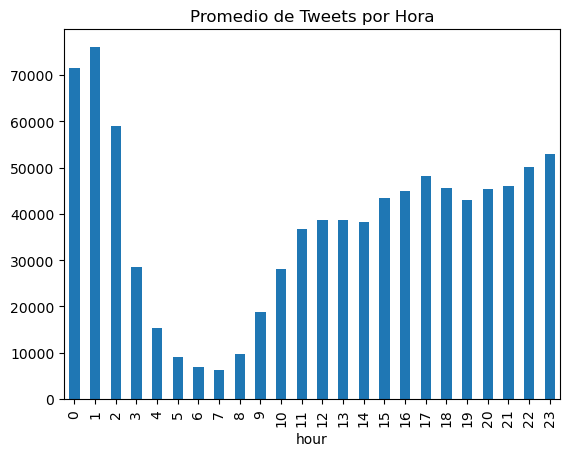

In [49]:
tweets_hour_pd = tweets_hour.toPandas()
tweets_hour_pd.plot.bar(x='hour', y='tweets', legend=False, title='Promedio de Tweets por Hora')


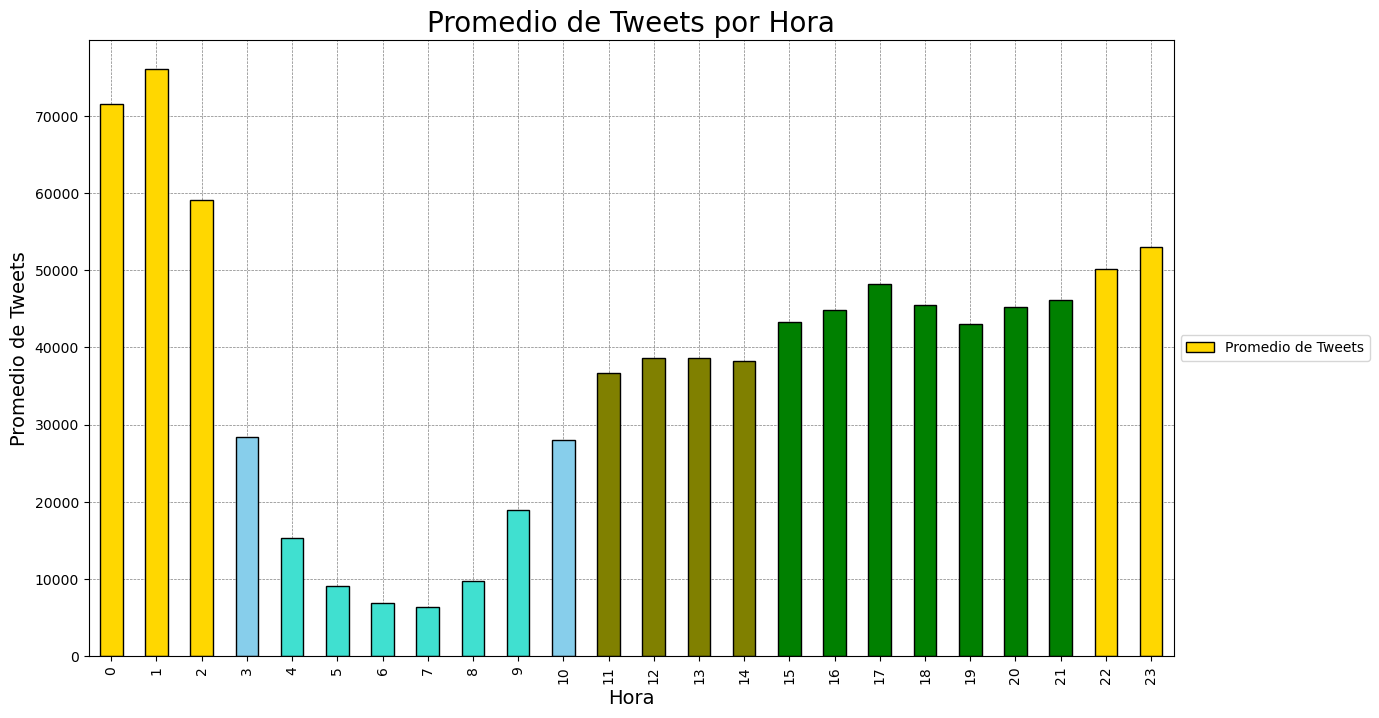

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir a DataFrame de Pandas
tweets_hour_pd = tweets_hour.toPandas()

# Definir una función para asignar colores basados en el valor de 'tweets'
def assign_color(value):
    if value < 20000:
        return 'turquoise'
    elif value < 30000:
        return 'skyblue'
    elif value < 40000:
        return 'olive'
    elif value < 50000:
        return 'green'
    else:
        return 'gold'

# Asignar colores a las barras
colors = tweets_hour_pd['tweets'].apply(assign_color)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 8))

# Crear gráfico de barras con colores personalizados
tweets_hour_pd.plot.bar(x='hour', y='tweets', ax=ax, color=colors, edgecolor='black', legend=False)

# Personalizar el gráfico
ax.set_title('Promedio de Tweets por Hora', fontsize=20)
ax.set_xlabel('Hora', fontsize=14)
ax.set_ylabel('Promedio de Tweets', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
ax.set_axisbelow(True)

# Añadir leyenda fuera del gráfico
ax.legend(['Promedio de Tweets'], loc='center left', bbox_to_anchor=(1.0, 0.5))

# Mostrar el gráfico
plt.show()


<font color="blue">**Resultados:**</font> 

* Con estos gráfcos se llega a la misma conclusón que con las tablas : las personas son **más activas en horas de la tarde hasta muy de noche** (a las 12, 1 y 2 de la noche), mens en el caso desde las **11 de la mañana hasta las 14**, cuano también hay muchos tweets (hora del almuerzo, comida o café para muchas personas)
* Sorprende ver que hay el mismo grado de actividad a las 3 de la madrugada como a las 10 de la mañana.

## **Parte 4:** Introducción a los datos relacionales

El hecho de trabajar con una base de datos que contiene información generada en una red social nos permite introducir el concepto de datos relacionales. Podemos definir datos relacionales como aquellos en los que existen relaciones entre las entidades que constituyen la base de datos. Si estas relaciones son binarias, relaciones 1 a 1, podemos representar las relaciones como un grafo compuesto por un conjunto de vértices $\mathcal{V}$ y un conjunto de aristas $\mathcal{E}$ que los relacionan.

En el caso de grafos que emergen de manera orgánica, este tipo de estructura va más allá de los grafos regulares que seguramente conocéis. Este tipo de estructuras se conocen como [redes complejas](https://es.wikipedia.org/wiki/Red_compleja). El estudio de la estructura y dinámicas de este tipo de redes ha contribuido a importantes resultados en campos tan dispares como la física, la sociología, la ecología o la medicina.

![complex_network](https://images.squarespace-cdn.com/content/5150aec6e4b0e340ec52710a/1364574727391-XVOFAB9P6GHKTDAH6QTA/lastfm_800_graph_white.png?content-type=image%2Fpng)

En esta última parte de la tarea vamos ha trabajar con este tipo de datos. En concreto vamos a modelar una de los posibles relaciones presentes en el dataset, la red de retweets.

### Generar la red de retweets

#### **Parte 4.1**: Construcción de la edgelist

Lo primero se os pide es que generéis la red. Hay diversas maneras de representar una red compleja, por ejemplo, si estuvierais interesados en trabajar en ellas desde el punto de vista teórico, la manera más habitual de representarlas es utilizando una [matriz de adyacencia](https://es.wikipedia.org/wiki/Matriz_de_adyacencia). En esta práctica vamos a centrarnos en el aspecto computacional, una de las maneras de mas eficientes (computacionalmente hablando) de representar una red es mediante su [*edge list*](https://en.wikipedia.org/wiki/Edge_list), una tabla que especifica la relación a parejas entre las entidades.

Las relaciones pueden ser bidireccionales o direccionales y tener algún peso asignado o no (weighted or unweighted). En el caso que nos ocupa, estamos hablando de una red dirigida, un usuario retuitea a otro, y podemos pensarla teniendo en cuenta cuántas veces esto ha pasado.

Lo primero que haréis para simplificar el cómputo,  es crear un sample homogéneo sin reemplazo del 10% de los tweets. Utilizando los conocimientos que habéis aprendido en el apartado 3.1. Utilizaremos 42 como valor para la seed.

In [72]:
fraction = 0.1
sample = tweets.sample(False, fraction, seed).persist()

Ahora vais a crear una tabla ```edgelist``` con la siguiente información:
- ***src:*** usuario que retuitea
- ***dst:*** usuario que es retuiteado
- ***weight:*** número de veces que un usuario retuitea a otro.

Filtrar el resultado para que contenga sólo las relaciones con un weight igual o mayor a dos.

In [73]:
edgelist = sample.where("retweeted_status.retweet_count > 0")\
                 .selectExpr("user.screen_name AS src", "retweeted_status.user.screen_name AS dst")

edgelist = edgelist.groupBy("src", "dst").count().withColumnRenamed("count", "weight").where("weight >= 2")

L = edgelist.count()

print("There are {0} edges on the network.".format(L))

There are 213 edges on the network.


In [77]:
assert L == 213, "Incorrect ouput"

#### **Parte 4.2:** Centralidad de grado

Uno de los descriptores más comunes en el análisis de redes es el grado. El grado cuantifica cuántas aristas están conectadas a cada vértices. En el caso de redes dirigidas como la que acabamos de crear este descriptor está descompuesto en el:
- **in degree**: cuantas aristas apuntan al nodo
- **out degree**: cuantas aristas salen del nodo

Si haces un ranquing de estos valores vais a obtener medida de centralidad, la [centralidad de grado](https://en.wikipedia.org/wiki/Centrality#Degree_centrality), de cada uno de los nodos.

Se os pide que generéis una tabla con la información:
- ***screen_name:*** nombre del usuario (anteriormene src).
- ***outDegree:*** out degree del nodo.

Ordenado la tabla por out degree en orden descendente.

In [83]:
outDegree = edgelist.groupBy("src")\
                    .count()\
                    .orderBy("count", ascending=False)\
                    .withColumnRenamed("count", "outDegree")\
                    .withColumnRenamed("src", "screen_name")

outDegree.limit(20).show()


+---------------+---------+
|    screen_name|outDegree|
+---------------+---------+
| Ivan_de_Vargas|        2|
|       Kattybcn|        2|
|     MndezSocas|        2|
|       jasalo54|        2|
|       BeaMartv|        2|
|pereirasergioba|        1|
|violeta11377531|        1|
|      JuankyRam|        1|
|    vicmontes11|        1|
|    CurritoRojo|        1|
|       aramarzz|        1|
|    ciberneando|        1|
|       isidrecp|        1|
|  Yolanda_Diaz_|        1|
|      Marahersa|        1|
|   vegaparrilla|        1|
|   eajpnvbilbao|        1|
|CsHortaGuinardo|        1|
|    gpscongreso|        1|
|   TorrijosMari|        1|
+---------------+---------+



In [84]:
output = outDegree.first()
assert output.screen_name == "Ivan_de_Vargas" and output.outDegree == 2, "Incorrect output"

Se os pide ahora que generéis una tabla con la información:
- ***screen_name:*** nombre del usuario (anteriormente dst).
- ***inDegree:*** in degree del nodo.

Ordenad la tabla por in degree en orden descendente.

In [89]:
inDegree = edgelist.groupBy("dst") \
                   .count() \
                   .orderBy("count", ascending=False) \
                   .withColumnRenamed("count", "inDegree") \
                   .withColumnRenamed("dst", "screen_name")

inDegree.limit(20).show()


+---------------+--------+
|    screen_name|inDegree|
+---------------+--------+
|         vox_es|      25|
|           PSOE|      24|
|   CiudadanosCs|      13|
|      JuntsXCat|      10|
|   ahorapodemos|       9|
|sanchezcastejon|       5|
|  Santi_ABASCAL|       4|
|      populares|       4|
| hermanntertsch|       4|
|           KRLS|       3|
|   pablocasado_|       3|
|Pablo_Iglesias_|       3|
|         boye_g|       2|
|    CastigadorY|       2|
|  CsCValenciana|       2|
|     eldiarioes|       2|
|       ppmadrid|       2|
|    protestona1|       2|
|  naciopolitica|       2|
|  AlbanoDante76|       2|
+---------------+--------+



In [ ]:
output = inDegree.first()
assert output.screen_name == "vox_es" and output.inDegree == 25, "Incorrect output"

En el contexto del análisis de redes sociales, especialmente al calcular la centralidad de grado (degree centrality), la tabla que muestras indica lo siguiente:

**"screen_name"**: Esta columna contiene los nombres de usuario (screen names) de las cuentas de Twitter u otras redes sociales. Cada fila representa una cuenta específica.

**"inDegree"**: Esta columna representa el grado de entrada (in-degree) de cada nodo (cuenta de usuario) en la red. El grado de entrada se refiere al número de conexiones entrantes que tiene un nodo específico. En el caso de las redes sociales como Twitter, esto generalmente se interpreta como el número de veces que una cuenta ha sido mencionada, retuiteada o respondida por otras cuentas.

<font color="blue">**Resultados:**</font> 

---> **Acabamos de ver las cuentas de usuario junto con su grado de entrada (in-degree), lo que es útil para entender la influencia relativa de diferentes cuentas dentro de la red social analizada.** 

---> **Las cuentas con mayores in-degrees suelen ser vistas como más influyentes o populares dentro de la comunidad, ya que reciben más interacciones de otras cuentas**.

* **vox_es**: Tiene un in-degree de 25, lo que indica que ha sido mencionado, retuiteado o respondido por otras cuentas un total de 25 veces en la red analizada.
* **PSOE**: Tiene un in-degree de 24, lo que significa que ha recibido 24 interacciones entrantes en forma de menciones, retuits o respuestas.
* **CiudadanosCs**: Tiene un in-degree de 13, lo que indica que ha sido objeto de 13 interacciones entrantes en la red.



